# Data Cleaning and Two Sample T test

## This notebook has three goals.
### 1. Clean the dataset so all null and extreme values have been dealt with.
### 2. Perform a Two sample t test to determine if having a high speed fastball does impact strikeout numbers.
### 3. Produce Plots to emphasize point two and also produce scatter  plots to test relationship between other features and strikeouts.

In [1]:
#importing necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as scs

In [2]:
#reading in datset

df=pd.read_csv('finalpitcherdataset.csv') 

In [3]:
#first 5 rows

df.head(20) 

,Unnamed: 0,Name,Age,#days,Lev,Tm,G,GS,W,L,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
0,0,Tim Adleman,28,1438,MLB-NL,Cincinnati,13,13,4.0,4.0,...,NaN,NaN,0.296,0.658,0.490,0.693,0.845,0.803,0.538,22.4
1,1,Chase Anderson,28,1441,MLB-NL,Milwaukee,31,30,9.0,11.0,...,-9.20,NaN,0.230,0.675,0.445,0.704,0.854,0.814,0.485,23.4
2,2,Cody Anderson,25,1441,MLB-AL,Cleveland,19,9,2.0,5.0,...,10.94,-2.41,0.309,0.701,0.526,0.585,0.829,0.765,0.554,22.4
3,3,Tyler Anderson,26,1444,MLB-NL,Colorado,19,19,5.0,6.0,...,NaN,NaN,0.308,0.666,0.505,0.629,0.850,0.789,0.549,23.2
4,4,Matt Andriese,26,1439,MLB-AL,Tampa Bay,29,19,8.0,8.0,...,NaN,NaN,0.357,0.627,0.492,0.602,0.897,0.789,0.499,25.3
5,5,Chris Archer,27,1440,MLB-AL,Tampa Bay,33,33,9.0,19.0,...,1.62,NaN,0.289,0.616,0.453,0.496,0.839,0.730,0.501,22.3
6,6,Jake Arrieta,30,1441,MLB-NL,Chicago,31,31,18.0,8.0,...,0.14,NaN,0.300,0.609,0.453,0.589,0.858,0.767,0.493,24.1
7,7,Trevor Bauer,25,1438,MLB-AL,Cleveland,35,28,12.0,8.0,...,2.96,NaN,0.239,0.618,0.441,0.587,0.860,0.791,0.533,20.9
8,8,Jose Berrios,22,1437,MLB-AL,Minnesota,14,14,3.0,7.0,...,NaN,NaN,0.250,0.630,0.430,0.695,0.859,0.809,0.473,21.4
9,9,Chad Bettis,27,1439,MLB-NL,Colorado,32,32,14.0,8.0,...,-0.02,17.94,0.287,0.628,0.448,0.630,0.890,0.802,0.473,20.3


# Data Cleaning

### The next set of cells all relate to dealing with missing values
### and also feature selection/elimination.

In [4]:
# Dropping unnecessary column

df.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [5]:
# Printing all the columns in the dataframe

cols = df.columns.tolist()  
cols                       

['Name',
 'Age',
 '#days',
 'Lev',
 'Tm',
 'G',
 'GS',
 'W',
 'L',
 'SV',
 'IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'HBP',
 'ERA',
 'AB',
 '2B',
 '3B',
 'IBB',
 'GDP',
 'SF',
 'SB',
 'CS',
 'PO',
 'BF',
 'Pit',
 'Str',
 'StL',
 'StS',
 'GB/FB',
 'LD',
 'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'SO/W',
 'Season',
 'Team',
 'Age.1',
 'W.1',
 'L.1',
 'ERA.1',
 'WAR',
 'G.1',
 'GS.1',
 'CG',
 'ShO',
 'SV.1',
 'BS',
 'IP.1',
 'TBF',
 'H.1',
 'R.1',
 'ER.1',
 'HR.1',
 'BB.1',
 'IBB.1',
 'HBP.1',
 'WP',
 'BK',
 'SO.1',
 'GB',
 'FB',
 'LD.1',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP.1',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB.1',
 'LD%',
 'GB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'Relieving',
 'Relief-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB%',
 'FBv',
 'SL%',
 'SLv',

In [6]:
for col in cols:
    print(f'{col}:{df[col].isna().sum()}') #looking for null values in features

Name:0
Age:0
#days:0
Lev:0
Tm:0
G:0
GS:0
W:7
L:1
SV:1111
IP:0
H:0
R:0
ER:0
BB:0
SO:0
HR:0
HBP:0
ERA:0
AB:0
2B:0
3B:0
IBB:0
GDP:0
SF:0
SB:0
CS:0
PO:0
BF:0
Pit:0
Str:0
StL:0
StS:0
GB/FB:0
LD:0
PU:0
WHIP:0
BAbip:0
SO9:0
SO/W:0
Season:0
Team:16
Age.1:16
W.1:16
L.1:16
ERA.1:16
WAR:16
G.1:16
GS.1:16
CG:16
ShO:16
SV.1:16
BS:16
IP.1:16
TBF:16
H.1:16
R.1:16
ER.1:16
HR.1:16
BB.1:16
IBB.1:16
HBP.1:16
WP:16
BK:16
SO.1:16
GB:16
FB:16
LD.1:16
IFFB:16
Balls:16
Strikes:16
Pitches:16
RS:16
IFH:16
BU:16
BUH:16
K/9:16
BB/9:16
K/BB:16
H/9:16
HR/9:16
AVG:16
WHIP.1:16
BABIP:16
LOB%:16
FIP:16
GB/FB.1:16
LD%:16
GB%:16
IFFB%:16
HR/FB:16
IFH%:16
BUH%:16
Starting:16
Start-IP:16
Relieving:683
Relief-IP:683
RAR:16
Dollars:16
tERA:16
xFIP:16
WPA:16
-WPA:16
+WPA:16
RE24:16
REW:16
pLI:16
inLI:16
gmLI:16
exLI:16
Pulls:16
WPA/LI:16
Clutch:16
FB%:16
FBv:16
SL%:345
SLv:345
CT%:774
CTv:774
CB%:191
CBv:191
CH%:92
CHv:92
SF%:1079
SFv:1079
KN%:1190
KNv:1190
XX%:248
PO%:1198
wFB:16
wSL:345
wCT:774
wCB:191
wCH:92
wSF:1079
wKN:

In [7]:
# Displaying rows with more than 2/3 of values being null

drop_candidates =[]
for col in cols:
    if df[col].isna().sum()/len(df)>=.5: 
        print(col)
        drop_candidates.append(col)
    else:
        pass

SV
Relieving
Relief-IP
CT%
CTv
SF%
SFv
KN%
KNv
PO%
wCT
wSF
wKN
wCT/C
wSF/C
wKN/C
FC% (pfx)
FS% (pfx)
FO% (pfx)
SI% (pfx)
KC% (pfx)
EP% (pfx)
SC% (pfx)
KN% (pfx)
UN% (pfx)
vFC (pfx)
vFS (pfx)
vFO (pfx)
vSI (pfx)
vKC (pfx)
vEP (pfx)
vSC (pfx)
vKN (pfx)
FC-X (pfx)
FS-X (pfx)
FO-X (pfx)
SI-X (pfx)
KC-X (pfx)
EP-X (pfx)
SC-X (pfx)
KN-X (pfx)
FC-Z (pfx)
FS-Z (pfx)
FO-Z (pfx)
SI-Z (pfx)
KC-Z (pfx)
EP-Z (pfx)
SC-Z (pfx)
KN-Z (pfx)
wFC (pfx)
wFS (pfx)
wFO (pfx)
wSI (pfx)
wKC (pfx)
wEP (pfx)
wSC (pfx)
wKN (pfx)
wFC/C (pfx)
wFS/C (pfx)
wFO/C (pfx)
wSI/C (pfx)
wKC/C (pfx)
wEP/C (pfx)
wSC/C (pfx)
wKN/C (pfx)
CS% (pi)
FC% (pi)
FS% (pi)
KN% (pi)
SB% (pi)
XX% (pi)
vCS (pi)
vFC (pi)
vFS (pi)
vKN (pi)
vSB (pi)
vXX (pi)
CS-X (pi)
FC-X (pi)
FS-X (pi)
KN-X (pi)
SB-X (pi)
XX-X (pi)
CS-Z (pi)
FC-Z (pi)
FS-Z (pi)
KN-Z (pi)
SB-Z (pi)
XX-Z (pi)
wCS (pi)
wFC (pi)
wFS (pi)
wKN (pi)
wSB (pi)
wXX (pi)
wCS/C (pi)
wFC/C (pi)
wFS/C (pi)
wKN/C (pi)
wSB/C (pi)
wXX/C (pi)


In [8]:
# Eliminitaing all pfx and pix features

test_list=drop_candidates[:3]+drop_candidates[16:]
test_list 

['SV',
 'Relieving',
 'Relief-IP',
 'FC% (pfx)',
 'FS% (pfx)',
 'FO% (pfx)',
 'SI% (pfx)',
 'KC% (pfx)',
 'EP% (pfx)',
 'SC% (pfx)',
 'KN% (pfx)',
 'UN% (pfx)',
 'vFC (pfx)',
 'vFS (pfx)',
 'vFO (pfx)',
 'vSI (pfx)',
 'vKC (pfx)',
 'vEP (pfx)',
 'vSC (pfx)',
 'vKN (pfx)',
 'FC-X (pfx)',
 'FS-X (pfx)',
 'FO-X (pfx)',
 'SI-X (pfx)',
 'KC-X (pfx)',
 'EP-X (pfx)',
 'SC-X (pfx)',
 'KN-X (pfx)',
 'FC-Z (pfx)',
 'FS-Z (pfx)',
 'FO-Z (pfx)',
 'SI-Z (pfx)',
 'KC-Z (pfx)',
 'EP-Z (pfx)',
 'SC-Z (pfx)',
 'KN-Z (pfx)',
 'wFC (pfx)',
 'wFS (pfx)',
 'wFO (pfx)',
 'wSI (pfx)',
 'wKC (pfx)',
 'wEP (pfx)',
 'wSC (pfx)',
 'wKN (pfx)',
 'wFC/C (pfx)',
 'wFS/C (pfx)',
 'wFO/C (pfx)',
 'wSI/C (pfx)',
 'wKC/C (pfx)',
 'wEP/C (pfx)',
 'wSC/C (pfx)',
 'wKN/C (pfx)',
 'CS% (pi)',
 'FC% (pi)',
 'FS% (pi)',
 'KN% (pi)',
 'SB% (pi)',
 'XX% (pi)',
 'vCS (pi)',
 'vFC (pi)',
 'vFS (pi)',
 'vKN (pi)',
 'vSB (pi)',
 'vXX (pi)',
 'CS-X (pi)',
 'FC-X (pi)',
 'FS-X (pi)',
 'KN-X (pi)',
 'SB-X (pi)',
 'XX-X (pi)',
 'CS-Z 

In [9]:
df_test=df.drop(labels=test_list,axis=1)

In [10]:
# Checking out remaining columns

df_test.columns 

Index(['Name', 'Age', '#days', 'Lev', 'Tm', 'G', 'GS', 'W', 'L', 'IP',
       ...
       'wSI/C (pi)', 'wSL/C (pi)', 'O-Swing% (pi)', 'Z-Swing% (pi)',
       'Swing% (pi)', 'O-Contact% (pi)', 'Z-Contact% (pi)', 'Contact% (pi)',
       'Zone% (pi)', 'Pace (pi)'],
      dtype='object', length=250)

In [11]:
# Checking null values column by column

for col in df_test.columns:
    if df_test[col].isna().any()==True:
        print(f"{col}:{df_test[col].isna().sum()}") 
          
    else:
        pass

W:7
L:1
Team:16
Age.1:16
W.1:16
L.1:16
ERA.1:16
WAR:16
G.1:16
GS.1:16
CG:16
ShO:16
SV.1:16
BS:16
IP.1:16
TBF:16
H.1:16
R.1:16
ER.1:16
HR.1:16
BB.1:16
IBB.1:16
HBP.1:16
WP:16
BK:16
SO.1:16
GB:16
FB:16
LD.1:16
IFFB:16
Balls:16
Strikes:16
Pitches:16
RS:16
IFH:16
BU:16
BUH:16
K/9:16
BB/9:16
K/BB:16
H/9:16
HR/9:16
AVG:16
WHIP.1:16
BABIP:16
LOB%:16
FIP:16
GB/FB.1:16
LD%:16
GB%:16
IFFB%:16
HR/FB:16
IFH%:16
BUH%:16
Starting:16
Start-IP:16
RAR:16
Dollars:16
tERA:16
xFIP:16
WPA:16
-WPA:16
+WPA:16
RE24:16
REW:16
pLI:16
inLI:16
gmLI:16
exLI:16
Pulls:16
WPA/LI:16
Clutch:16
FB%:16
FBv:16
SL%:345
SLv:345
CT%:774
CTv:774
CB%:191
CBv:191
CH%:92
CHv:92
SF%:1079
SFv:1079
KN%:1190
KNv:1190
XX%:248
PO%:1198
wFB:16
wSL:345
wCT:774
wCB:191
wCH:92
wSF:1079
wKN:1190
wFB/C:16
wSL/C:345
wCT/C:774
wCB/C:191
wCH/C:92
wSF/C:1079
wKN/C:1190
O-Swing%:16
Z-Swing%:16
Swing%:16
O-Contact%:16
Z-Contact%:16
Contact%:16
Zone%:16
F-Strike%:16
SwStr%:16
HLD:16
SD:16
MD:16
ERA-:16
FIP-:16
xFIP-:16
K%:16
BB%:16
SIERA:16
RS/9:1

In [12]:
# df_test_2
second_drop_list=[]
for col in df_test.columns:
    if col.endswith(')'): #getting rid or (pi) and (pix) cols because redundant values
        second_drop_list.append(col)
    else:
        pass
len(second_drop_list)

75

In [13]:
df_test_2=df_test.drop(axis=1,labels=second_drop_list)

In [14]:
len(df_test_2.columns)

175

In [15]:
# Remaining columns

new_feats=df_test_2.columns.tolist()
new_feats 

['Name',
 'Age',
 '#days',
 'Lev',
 'Tm',
 'G',
 'GS',
 'W',
 'L',
 'IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'HBP',
 'ERA',
 'AB',
 '2B',
 '3B',
 'IBB',
 'GDP',
 'SF',
 'SB',
 'CS',
 'PO',
 'BF',
 'Pit',
 'Str',
 'StL',
 'StS',
 'GB/FB',
 'LD',
 'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'SO/W',
 'Season',
 'Team',
 'Age.1',
 'W.1',
 'L.1',
 'ERA.1',
 'WAR',
 'G.1',
 'GS.1',
 'CG',
 'ShO',
 'SV.1',
 'BS',
 'IP.1',
 'TBF',
 'H.1',
 'R.1',
 'ER.1',
 'HR.1',
 'BB.1',
 'IBB.1',
 'HBP.1',
 'WP',
 'BK',
 'SO.1',
 'GB',
 'FB',
 'LD.1',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP.1',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB.1',
 'LD%',
 'GB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB%',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 '

In [16]:
# Getting rid of more redundant features

new_drops=[]
for feat in new_feats:
    if feat.endswith('.1'): 
        new_drops.append(feat)
    else:
        pass
len(new_drops)

19

In [17]:
df_3=df_test_2.drop(axis=1,labels=new_drops)

In [18]:
filter_cols=df_3.columns.tolist()
filter_cols

['Name',
 'Age',
 '#days',
 'Lev',
 'Tm',
 'G',
 'GS',
 'W',
 'L',
 'IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'HBP',
 'ERA',
 'AB',
 '2B',
 '3B',
 'IBB',
 'GDP',
 'SF',
 'SB',
 'CS',
 'PO',
 'BF',
 'Pit',
 'Str',
 'StL',
 'StS',
 'GB/FB',
 'LD',
 'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'SO/W',
 'Season',
 'Team',
 'WAR',
 'CG',
 'ShO',
 'BS',
 'TBF',
 'WP',
 'BK',
 'GB',
 'FB',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'BABIP',
 'LOB%',
 'FIP',
 'LD%',
 'GB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'FB%',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C

In [19]:
# Getting rid of rate features, only using counting features

more_drops=[] 
for col in filter_cols:
    if '/' in col:
        more_drops.append(col)
    else:
        pass
len(more_drops)        

17

In [20]:
filtered_df=df_3.drop(axis=1,labels=more_drops)

In [21]:
filter_cols=filtered_df.columns.tolist()
filter_cols #remaining cols

['Name',
 'Age',
 '#days',
 'Lev',
 'Tm',
 'G',
 'GS',
 'W',
 'L',
 'IP',
 'H',
 'R',
 'ER',
 'BB',
 'SO',
 'HR',
 'HBP',
 'ERA',
 'AB',
 '2B',
 '3B',
 'IBB',
 'GDP',
 'SF',
 'SB',
 'CS',
 'PO',
 'BF',
 'Pit',
 'Str',
 'StL',
 'StS',
 'LD',
 'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'Season',
 'Team',
 'WAR',
 'CG',
 'ShO',
 'BS',
 'TBF',
 'WP',
 'BK',
 'GB',
 'FB',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'AVG',
 'BABIP',
 'LOB%',
 'FIP',
 'LD%',
 'GB%',
 'IFFB%',
 'IFH%',
 'BUH%',
 'Starting',
 'Start-IP',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'Clutch',
 'FB%',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'HLD',
 'SD',
 'MD',
 'E

In [22]:
# Checking null values

for col in filter_cols: 
    if df_3[col].isna().any()==True:
        print(f"{col}:{df_3[col].isna().sum()}")
    else:
        pass  

W:7
L:1
Team:16
WAR:16
CG:16
ShO:16
BS:16
TBF:16
WP:16
BK:16
GB:16
FB:16
IFFB:16
Balls:16
Strikes:16
Pitches:16
RS:16
IFH:16
BU:16
BUH:16
AVG:16
BABIP:16
LOB%:16
FIP:16
LD%:16
GB%:16
IFFB%:16
IFH%:16
BUH%:16
Starting:16
Start-IP:16
RAR:16
Dollars:16
tERA:16
xFIP:16
WPA:16
-WPA:16
+WPA:16
RE24:16
REW:16
pLI:16
inLI:16
gmLI:16
exLI:16
Pulls:16
Clutch:16
FB%:16
FBv:16
SL%:345
SLv:345
CT%:774
CTv:774
CB%:191
CBv:191
CH%:92
CHv:92
SF%:1079
SFv:1079
KN%:1190
KNv:1190
XX%:248
PO%:1198
wFB:16
wSL:345
wCT:774
wCB:191
wCH:92
wSF:1079
wKN:1190
O-Swing%:16
Z-Swing%:16
Swing%:16
O-Contact%:16
Z-Contact%:16
Contact%:16
Zone%:16
F-Strike%:16
SwStr%:16
HLD:16
SD:16
MD:16
ERA-:16
FIP-:16
xFIP-:16
K%:16
BB%:16
SIERA:16
E-F:16
Pace:16
RA9-WAR:16
BIP-Wins:16
LOB-Wins:16
FDP-Wins:16
Age Rng:16
K-BB%:16
Pull%:16
Cent%:16
Oppo%:16
Soft%:16
Med%:16
Hard%:16
kwERA:16
TTO%:16


In [23]:
# Getting rid of features with too many nulls

too_many_nulls=['Starting','Start-IP','CT%','CTv','SF%','SFv','KN%','KNv','PO%','wCT',
'wSF','wKN']
df_4=filtered_df.drop(axis=1,labels=too_many_nulls) 

In [24]:
new=df_4.columns.tolist()

In [25]:
# Number of features remaining

len(new) 

127

In [26]:
# Null values status

for col in new: 
    if df_4[col].isna().any()==True:
        print(f"{col}:{df_4[col].isna().sum()}")
    else:
        pass  

W:7
L:1
Team:16
WAR:16
CG:16
ShO:16
BS:16
TBF:16
WP:16
BK:16
GB:16
FB:16
IFFB:16
Balls:16
Strikes:16
Pitches:16
RS:16
IFH:16
BU:16
BUH:16
AVG:16
BABIP:16
LOB%:16
FIP:16
LD%:16
GB%:16
IFFB%:16
IFH%:16
BUH%:16
RAR:16
Dollars:16
tERA:16
xFIP:16
WPA:16
-WPA:16
+WPA:16
RE24:16
REW:16
pLI:16
inLI:16
gmLI:16
exLI:16
Pulls:16
Clutch:16
FB%:16
FBv:16
SL%:345
SLv:345
CB%:191
CBv:191
CH%:92
CHv:92
XX%:248
wFB:16
wSL:345
wCB:191
wCH:92
O-Swing%:16
Z-Swing%:16
Swing%:16
O-Contact%:16
Z-Contact%:16
Contact%:16
Zone%:16
F-Strike%:16
SwStr%:16
HLD:16
SD:16
MD:16
ERA-:16
FIP-:16
xFIP-:16
K%:16
BB%:16
SIERA:16
E-F:16
Pace:16
RA9-WAR:16
BIP-Wins:16
LOB-Wins:16
FDP-Wins:16
Age Rng:16
K-BB%:16
Pull%:16
Cent%:16
Oppo%:16
Soft%:16
Med%:16
Hard%:16
kwERA:16
TTO%:16


In [27]:
# Shape of filtered dataframe

df_4.shape 

(1198, 127)

In [28]:
# Number of rows before 2019

len(df_4[df_4.Season!=2019]) 

999

In [29]:
some_nulls=['W','L','WAR','CG','ShO','BS','TBF','WP','BK','GB','FB',
'IFFB','Balls', 'Strikes','Pitches','RS','IFH','BU','BUH','AVG','BABIP'
,'LOB%','FIP','LD%','GB%','IFFB%','IFH%','BUH%','RAR','tERA','xFIP',
'WPA','-WPA','+WPA','RE24','REW','pLI','inLI','gmLI','exLI','Pulls','Clutch','FB%',
 'FBv','wFB','O-Swing%','Z-Swing%','Swing%','O-Contact%','Z-Contact%',
'Contact%','Zone%','F-Strike%','SwStr%','HLD','SD','MD','ERA-','FIP-',
'xFIP-','K%','BB%','SIERA','E-F','Pace','RA9-WAR','BIP-Wins','LOB-Wins',
'FDP-Wins','K-BB%','Pull%','Cent%','Oppo%','Soft%',
'Med%','Hard%','kwERA','TTO%']

In [30]:
for null in some_nulls:
    df_4[null].fillna(df_4[null].median(),inplace=True)

In [31]:
# Null values status

for col in new: 
    if df_4[col].isna().any()==True:
        print(f"{col}:{df_4[col].isna().sum()}")
    else:
        pass  

Team:16
Dollars:16
SL%:345
SLv:345
CB%:191
CBv:191
CH%:92
CHv:92
XX%:248
wSL:345
wCB:191
wCH:92
Age Rng:16


In [32]:
df_4.drop(axis=1,labels=['Team','Dollars','XX%','Age Rng'],inplace=True)

In [33]:
len(df_4.columns)

123

In [34]:
# Using median to fill null values

df_4['SLv'].fillna(df_4['SLv'].median(),inplace=True)
df_4['CBv'].fillna(df_4['CBv'].median(),inplace=True)
df_4['CHv'].fillna(df_4['CHv'].median(),inplace=True)

In [35]:
# Filling nulls with 0 because value should be 0

df_4['wSL'].fillna(0,inplace=True) 
df_4['wCB'].fillna(0,inplace=True) 
df_4['wCH'].fillna(0,inplace=True)

In [36]:
# Remaining null cols 

for col in df_4.columns: 
    if df_4[col].isna().any()==True:
        print(f"{col}:{df_4[col].isna().sum()}")
    else:
        pass  

SL%:345
CB%:191
CH%:92


In [37]:
# Filling nulls with 0 because value should be 0

df_4['SL%'].fillna(0,inplace=True)
df_4['CB%'].fillna(0,inplace=True) 
df_4['CH%'].fillna(0,inplace=True) 

In [38]:
df_4['SL%']=np.where(df['SL%']==0,1-df_4['FB%']-df_4['CH%']-df_4['CB%'],df_4['SL%'])

In [39]:
df_4['CB%']=np.where(df['CB%']==0,1-df_4['FB%']-df_4['CH%']-df_4['SL%'],df_4['CB%'])

In [40]:
df_4['CH%']=np.where(df_4['CH%']==0,1-df_4['FB%']-df_4['SL%']-df_4['CB%'],df_4['CH%'])

In [41]:
# No output means no remaing null values

for col in df_4.columns:
    if df_4[col].isna().any()==True:
        print(f"{col}:{df_4[col].isna().sum()}")
    else:
        pass  

In [78]:
# Filtered dataframe shape

df_4.shape 

(1198, 124)

In [62]:
df_4.to_csv('Cleanpitcherdataset.csv') #saving df to csv

In [6]:
import pandas as pd
import numpy as np

In [7]:
df=pd.read_csv('Cleanpitcherdataset.csv') #reading in new csv

In [8]:
# Adding best pitch feat which is best pitch for each pitcher

conditions = [
    (df['wFB']>df['wSL']) & (df['wFB']>df['wCB']) & (df['wFB'] > df['wCH']),
    (df['wSL']>df['wFB']) & (df['wSL']>df['wCB']) & (df['wSL'] > df['wCH']),
    (df['wCB']>df['wSL']) & (df['wCB']>df['wFB']) & (df['wCB'] > df['wCH']),
    (df['wCH']>df['wSL']) & (df['wCH']>df['wCB']) & (df['wCH'] > df['wFB'])
]
choices = [
    'FB',
    'SL',
    'CB',
    'CH' 
]
df['Best_Pitch'] = np.select(conditions, choices, default = np.nan)

In [9]:
# Shape including new feature

df.shape 

(1198, 125)

In [11]:
#Saving df to csv

df.to_csv('Cleanpitcherdataset.csv') 

In [10]:
df[df.Season!=2019].shape

(999, 125)

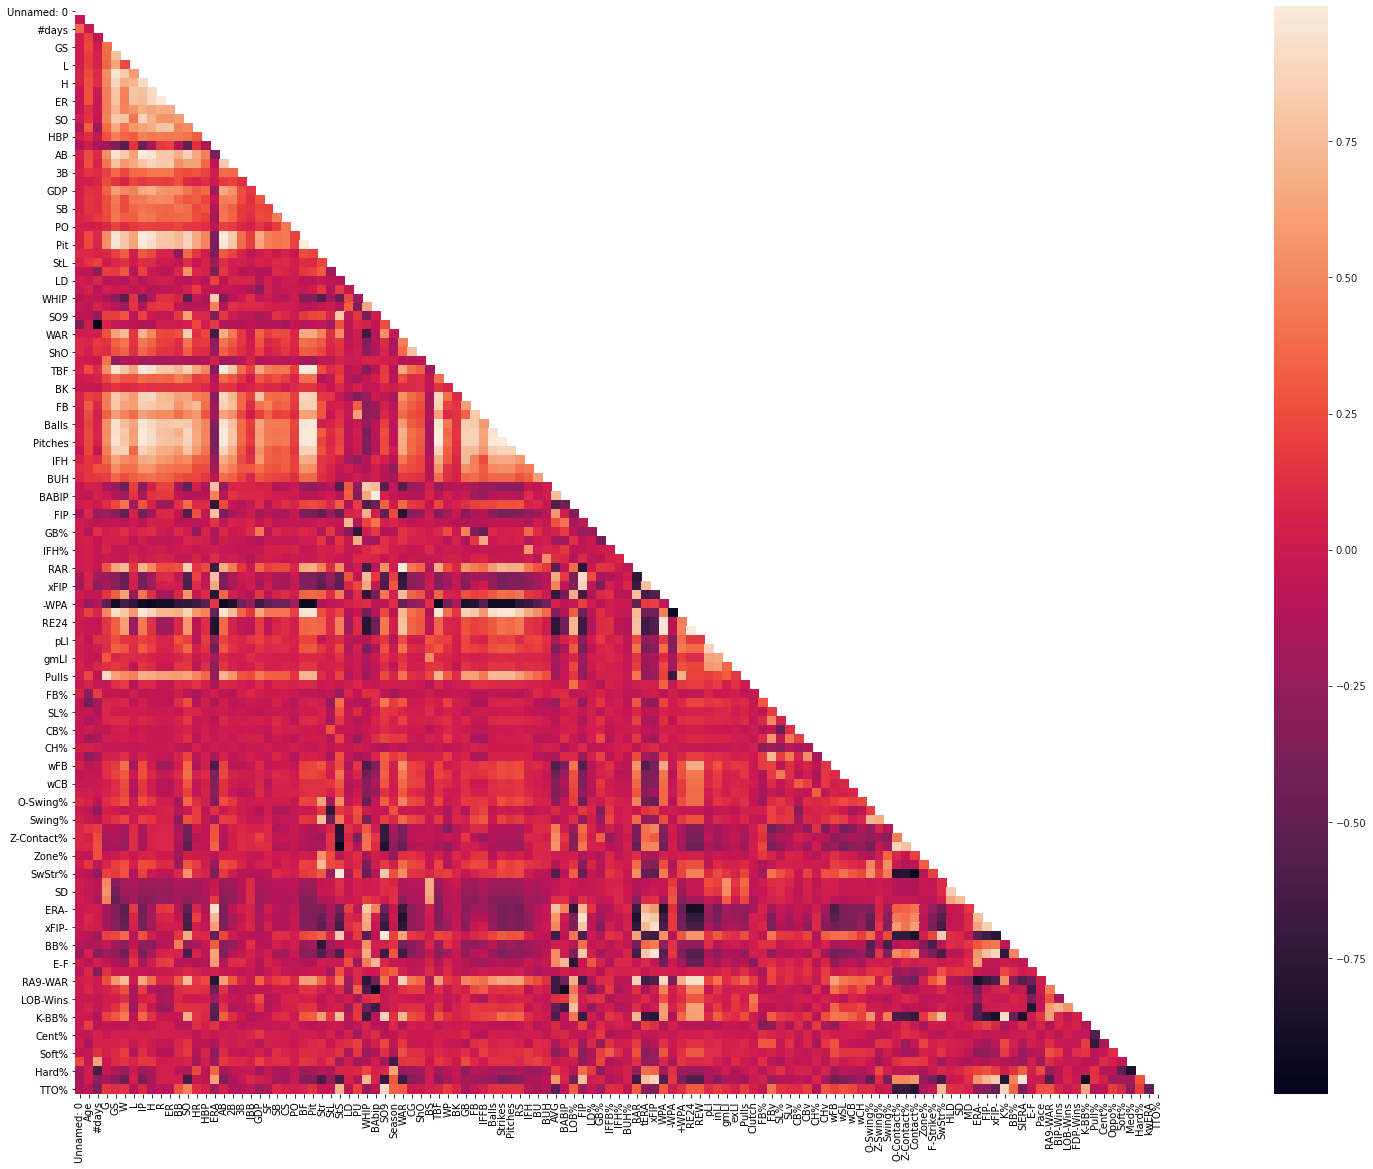

In [67]:
# Heat map of correlations

fig, ax = plt.subplots(figsize=(40, 20))
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(df.corr(), mask=mask, square=True)

## Statistical Testing
### Is there a significant differnce in strikeouts between guys who throw 95+ mph on average vs guys who throw less hard?
### Ho u1-u2=0 In other words there is no differnce between average number of strikeouts between the twogroups
### Ha u1-u2≠0 There is a statistically siginifcant differnce between average strikeouts

In [68]:
df_fast=df.loc[df.FBv>=95,['Name','SO','BB','ERA','FBv','FB%']].sort_values('FBv',ascending=False)

In [69]:
df_slow=df.loc[df.FBv<95,['Name','SO','BB','ERA','FBv','FB%']].sort_values('FBv',ascending=False)

In [70]:
mean_95_plus=df_fast.SO.mean()
std_95_plus=df_fast.SO.std()
len_95_plus=len(df_fast)

In [71]:
mean_95_less=df_slow.SO.mean()
std_95_less=df_slow.SO.std()
len_95_less=len(df_slow)

In [72]:
num=mean_95_plus-mean_95_less
denom=np.sqrt((std_95_plus**2/len_95_plus)+(std_95_less**2/len_95_less))

In [73]:
#Assuming alpha of .05, two tail so alpha=.025 for each tail

T_stat=num/denom 
T_stat

5.303859160529021

In [74]:
# Smaller sample data size

df=len_95_plus-1 
df

111

In [75]:
# The probability of finding a more extreme value

p_val=scs.t.sf(T_stat,df)
p_val 

2.9225238704383334e-07

## So our p_val is 10^-7 which is significantly smaller than our threshold of .025 thus we can reject our null hypothesis.
## Thus, there is a statistical siginficance differnce between these two groups.

Text(0.5, 1.0, 'Strikeouts of 95 mph+ Pitchers vs those who throw less hard')

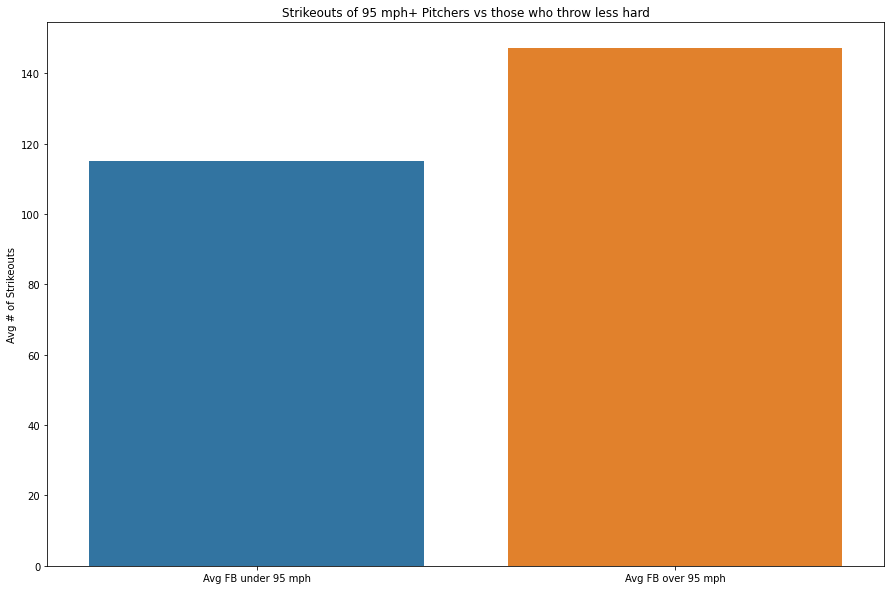

In [76]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(x=[0,1],y=[mean_95_less,mean_95_plus],ax=ax)
ax.set_xticklabels(labels=['Avg FB under 95 mph','Avg FB over 95 mph'])
ax.set_ylabel('Avg # of Strikeouts')
ax.set_title('Strikeouts of 95 mph+ Pitchers vs those who throw less hard')